In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

dataset=pd.read_csv('order_train1.csv')
dataset.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty,is_holiday,season,period,on_sale
0,2015-9-1,104,22069,307,403,offline,1114.0,19,0,Autumn,begin,0
1,2015-9-1,104,20028,301,405,offline,1012.0,12,0,Autumn,begin,0
2,2015-9-2,104,21183,307,403,online,428.0,109,0,Autumn,begin,0
3,2015-9-2,104,20448,308,404,online,962.0,3,0,Autumn,begin,0
4,2015-9-2,104,21565,307,403,offline,1400.0,3,0,Autumn,begin,0


In [5]:
dataset.describe()

,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty,is_holiday,on_sale
count,597694.000000,597694.000000,597694.000000,597694.000000,597694.000000,597694.000000,597694.000000,597694.000000
mean,102.903949,21008.015983,304.932094,406.457174,1076.241578,91.650505,0.034223,0.015503
std,1.504880,590.896347,2.004195,3.107329,1167.511104,199.843336,0.181802,0.123542
min,101.000000,20001.000000,301.000000,401.000000,1.000000,1.000000,0.000000,0.000000
25%,102.000000,20518.000000,303.000000,404.000000,598.000000,10.000000,0.000000,0.000000
50%,103.000000,20976.000000,306.000000,407.000000,883.000000,29.000000,0.000000,0.000000
75%,105.000000,21521.000000,306.000000,408.000000,1291.000000,101.000000,0.000000,0.000000
max,105.000000,22084.000000,308.000000,412.000000,260014.000000,16308.000000,1.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597694 entries, 0 to 597693
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         597694 non-null  object 
 1   sales_region_code  597694 non-null  int64  
 2   item_code          597694 non-null  int64  
 3   first_cate_code    597694 non-null  int64  
 4   second_cate_code   597694 non-null  int64  
 5   sales_chan_name    597694 non-null  object 
 6   item_price         597694 non-null  float64
 7   ord_qty            597694 non-null  int64  
 8   is_holiday         597694 non-null  int64  
 9   season             597694 non-null  object 
 10  period             597694 non-null  object 
 11  on_sale            597694 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 54.7+ MB


In [7]:
#统计表格中是否有空值
dataset.isnull().sum()

order_date           0
sales_region_code    0
item_code            0
first_cate_code      0
second_cate_code     0
sales_chan_name      0
item_price           0
ord_qty              0
is_holiday           0
season               0
period               0
on_sale              0
dtype: int64

In [8]:
#产品的不同价格对需求量的影响(弱相关)
price=dataset['item_price']
order=dataset['ord_qty']
np.corrcoef(price,order)

array([[ 1.        , -0.12078224],
       [-0.12078224,  1.        ]])

In [9]:
#分析出现频率较高产品 如21271产品不同价格对需求量的影响
dataset["item_code"].value_counts()

21271    8455
20973    8239
21619    6450
20501    5418
20283    4784
         ... 
20307       1
20077       1
21217       1
21747       1
21320       1
Name: item_code, Length: 1758, dtype: int64

In [10]:
df1=dataset[dataset['item_code']==21271]
df1.describe()

,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty,is_holiday,on_sale
count,8455.000000,8455.0,8455.0,8455.0,8455.000000,8455.000000,8455.000000,8455.000000
mean,102.122058,21271.0,306.0,407.0,498.466343,276.736369,0.031815,0.015494
std,0.994665,0.0,0.0,0.0,79.230402,375.751964,0.175519,0.123513
min,101.000000,21271.0,306.0,407.0,255.700000,1.000000,0.000000,0.000000
25%,101.000000,21271.0,306.0,407.0,467.000000,42.000000,0.000000,0.000000
50%,102.000000,21271.0,306.0,407.0,484.000000,157.000000,0.000000,0.000000
75%,103.000000,21271.0,306.0,407.0,520.000000,367.000000,0.000000,0.000000
max,105.000000,21271.0,306.0,407.0,2474.280000,5179.000000,1.000000,1.000000


(0.0, 5200.0)

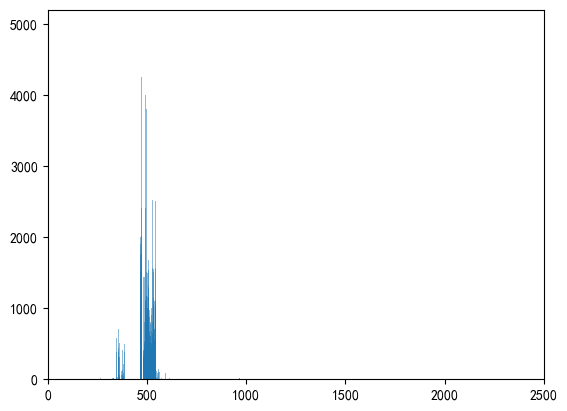

In [48]:
plt.bar(df1["item_price"],df1["ord_qty"],align='center',alpha=0.5)
plt.xlim((0,2500))
plt.ylim((0,5200))

In [49]:
df2=dataset[dataset['item_code']==20973]
df2.describe()

,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty,is_holiday,on_sale
count,8239.000000,8239.0,8239.0,8239.0,8239.000000,8239.000000,8239.000000,8239.000000
mean,102.317514,20973.0,306.0,407.0,577.990688,197.314601,0.031193,0.015779
std,0.927015,0.0,0.0,0.0,98.121514,266.616748,0.173850,0.124626
min,101.000000,20973.0,306.0,407.0,270.500000,1.000000,0.000000,0.000000
25%,102.000000,20973.0,306.0,407.0,540.000000,21.000000,0.000000,0.000000
50%,102.000000,20973.0,306.0,407.0,569.000000,106.000000,0.000000,0.000000
75%,103.000000,20973.0,306.0,407.0,602.000000,265.000000,0.000000,0.000000
max,105.000000,20973.0,306.0,407.0,3149.000000,3611.000000,1.000000,1.000000


(0.0, 3700.0)

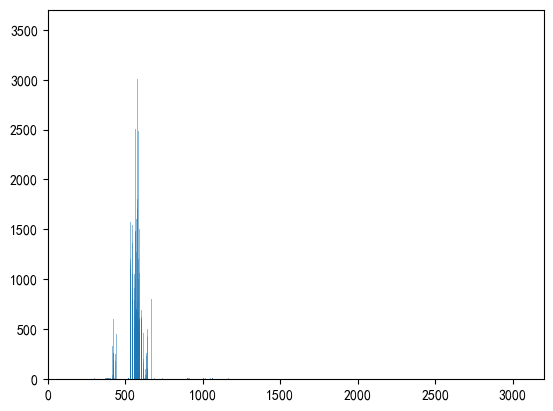

In [50]:
plt.bar(df2["item_price"],df2["ord_qty"],align='center',alpha=0.5)
plt.xlim((0,3200))
plt.ylim((0,3700))

In [51]:
df3=dataset[dataset['item_code']==21619]
df3.describe()

,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty,is_holiday,on_sale
count,6450.000000,6450.0,6450.0,6450.0,6450.000000,6450.000000,6450.000000,6450.000000
mean,103.051628,21619.0,306.0,402.0,307.526462,298.993953,0.040155,0.016589
std,1.653305,0.0,0.0,0.0,72.489701,582.129675,0.196338,0.127736
min,101.000000,21619.0,306.0,402.0,2.000000,1.000000,0.000000,0.000000
25%,101.000000,21619.0,306.0,402.0,272.000000,14.000000,0.000000,0.000000
50%,103.000000,21619.0,306.0,402.0,299.000000,104.000000,0.000000,0.000000
75%,105.000000,21619.0,306.0,402.0,324.000000,331.500000,0.000000,0.000000
max,105.000000,21619.0,306.0,402.0,1604.000000,16308.000000,1.000000,1.000000


<BarContainer object of 6450 artists>

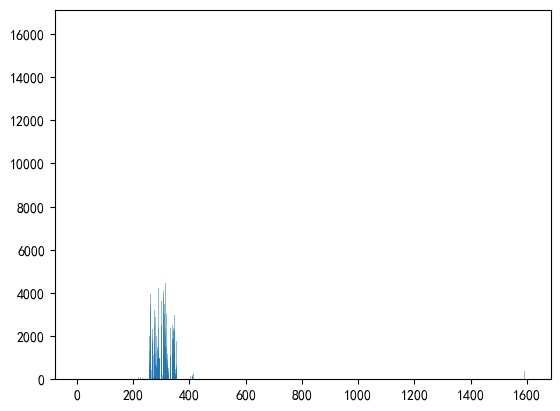

In [58]:
price3=df3["item_price"]
sales3=df3["ord_qty"]
plt.bar(df3["item_price"],df3["ord_qty"],align='center',alpha=0.5)
#plt.plot(price3,norm.pdf(price3,np.mean(price3),np.std(price3)),'k',linewidth=2)

<AxesSubplot:xlabel='item_price', ylabel='ord_qty'>

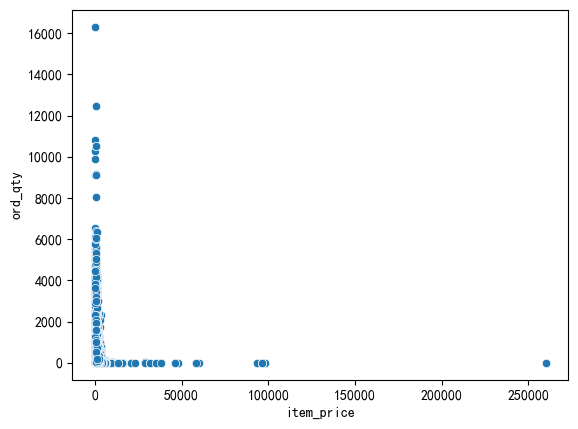

In [21]:
sns.scatterplot(x="item_price",y="ord_qty",data=dataset)

<AxesSubplot:>

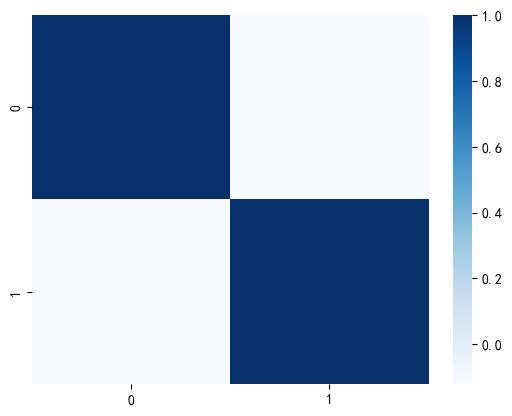

In [34]:
sns.heatmap(np.corrcoef(price,order),cmap="Blues")

<AxesSubplot:xlabel='sales_region_code', ylabel='ord_qty'>

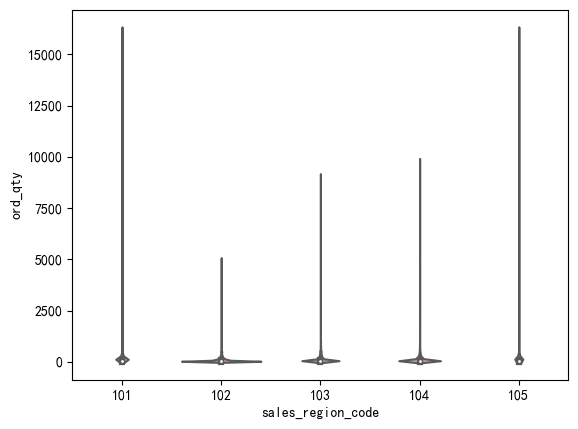

In [8]:
#产品所在区域对需求量的影响，以及不同区域的产品需求量有何特性
sns.violinplot(x="sales_region_code", y="ord_qty",
                    data=dataset, palette="Set2")

In [11]:
#分别统计不同地区销售总和所占比例
sale=dataset.groupby('sales_region_code')['ord_qty'].sum()
sale

sales_region_code
101    12402968
102    13970148
103    11522186
104     2387653
105    14496002
Name: ord_qty, dtype: int64

In [12]:
pip install jupyter-echarts-pypkg

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


([<matplotlib.patches.Wedge at 0x20c80c89790>,
 [Text(0.8332547613025814, 0.7181131545700707, '101'),
  Text(-0.6683516221470595, 0.8736739146691942, '102'),
  Text(-0.9410824086983677, -0.5695295427266953, '103'),
  Text(-0.249531045225628, -1.0713236007241724, '104'),
  Text(0.7412658519723044, -0.8127268524539926, '105')],
 [Text(0.4545025970741352, 0.3916980843109476, '22.6%'),
  Text(-0.36455543026203235, 0.47654940800137857, '25.5%'),
  Text(-0.5133176774718369, -0.31065247785092465, '21.0%'),
  Text(-0.13610784285034253, -0.5843583276677303, '4.4%'),
  Text(0.4043268283485296, -0.44330555588399595, '26.5%')])

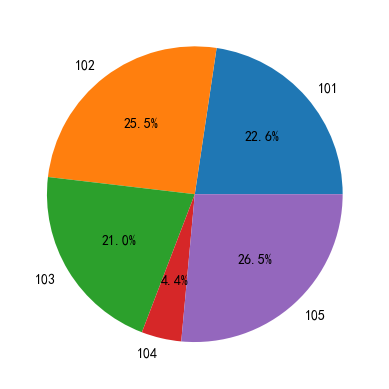

In [12]:
labels=['101','102','103','104','105']
sales=[12402968,13970148,11522186,2387653,14496002]
#plt.legend()
plt.pie(sales,labels=labels,autopct='%.1f%%')

In [13]:
from pyecharts import Pie
pie = Pie("饼图-圆环图示例", title_pos='center')
pie.add(
    "",
    labels,
    sales,
    radius=[40, 75],
    label_text_color=None,
    is_label_show=True,
    legend_orient="vertical",
    legend_pos="left",
)
pie.render_notebook()

<AxesSubplot:xlabel='sales_chan_name', ylabel='ord_qty'>

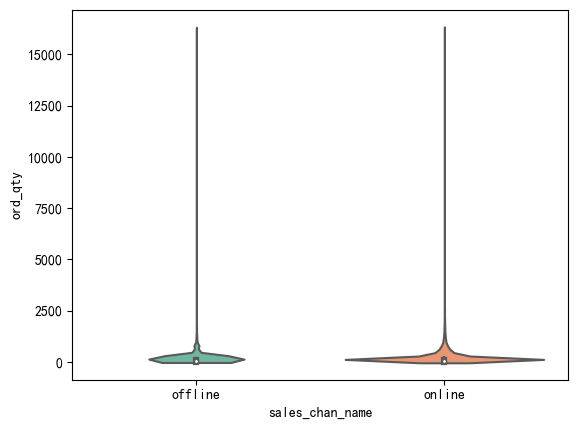

In [14]:
#不同销售方式（线上和线下）的产品需求量的特性
sns.violinplot(x="sales_chan_name", y="ord_qty",
                    data=dataset, palette="Set2")

<AxesSubplot:xlabel='first_cate_code', ylabel='ord_qty'>

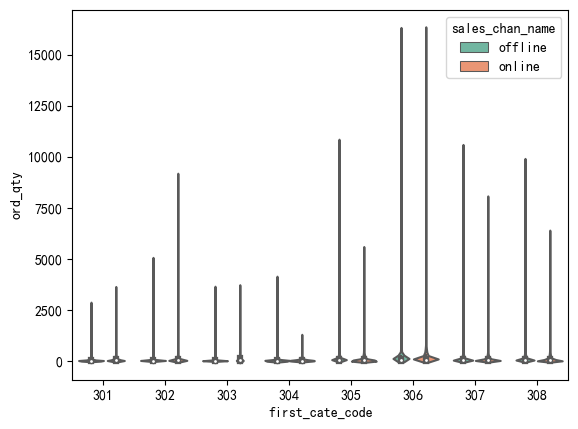

In [26]:
#不同品类之间的产品需求量有何不同点和共同点
sns.violinplot(x="first_cate_code", y="ord_qty",hue="sales_chan_name",
                    data=dataset, palette="Set2")

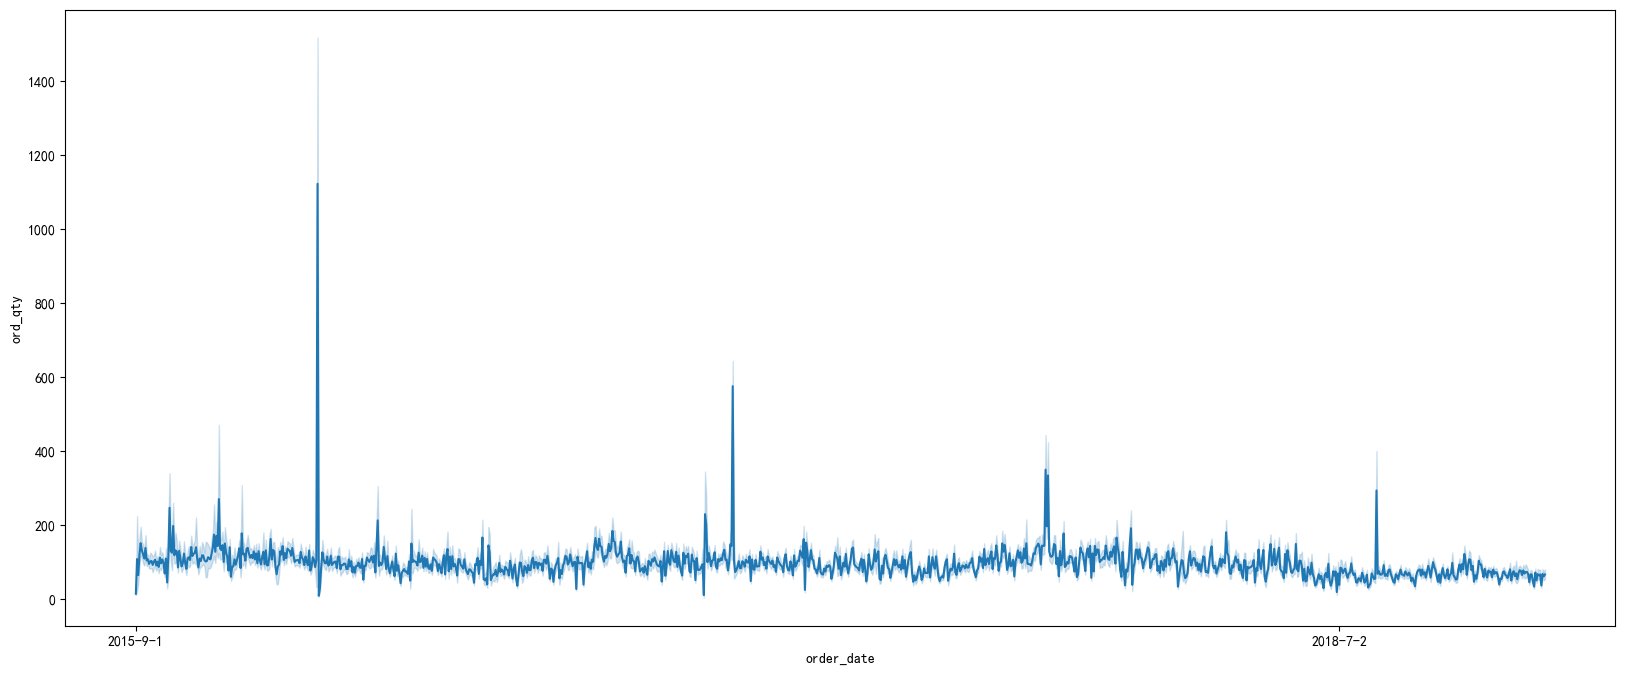

In [21]:
import matplotlib.ticker as ticker

plt.figure(
    figsize = (20,8),
    dpi = 100        
)

# 长型数据多折线图
ax = sns.lineplot(
    data=dataset,
    x='order_date',
    y='ord_qty'
)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1000)) # 解决X轴密集问题
plt.show()


<AxesSubplot:xlabel='first_cate_code', ylabel='ord_qty'>

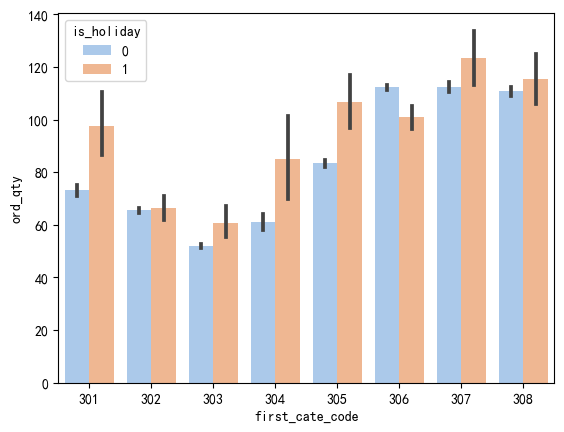

In [30]:
sns.barplot(x = 'first_cate_code', y = 'ord_qty', data = dataset,hue='is_holiday',palette="pastel")

<AxesSubplot:xlabel='first_cate_code', ylabel='ord_qty'>

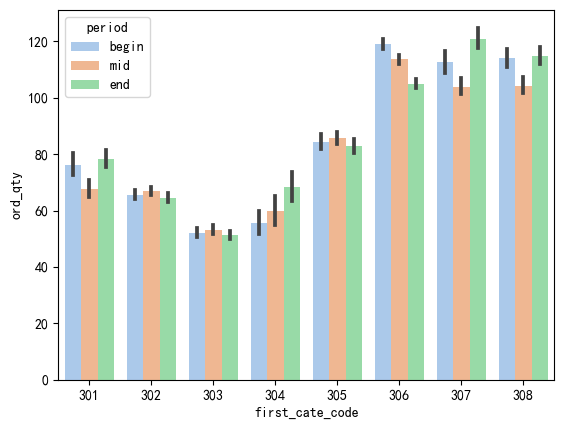

In [31]:
sns.barplot(x = 'first_cate_code', y = 'ord_qty', data = dataset,hue='period',palette="pastel")

<AxesSubplot:xlabel='first_cate_code', ylabel='ord_qty'>

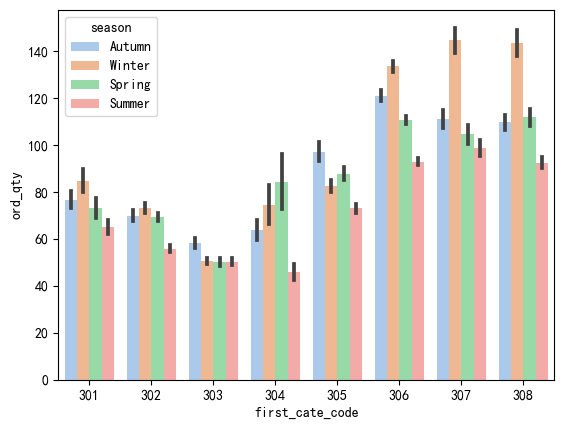

In [32]:
sns.barplot(x = 'first_cate_code', y = 'ord_qty', data = dataset,hue='season',palette="pastel")